PART - A

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

1. NULL HYPOTHESIS  : Every plant bearing flowers in purple to white ratio is 3:1


ALTERNATE HYPOTHESIS :Every plant bearing flowers in purple to white ratio is not 3:1

H0 : μ = 60

H1 :  μ !=60


2) What statistic do you recommend to apply for this case

Statistic recommended : Ratio between purple and white flower



In [47]:
import random

flower = ['purple']*775
white = ['white']*154

flower.extend(white)

random.shuffle(flower)
flower[775:790]

['purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'white',
 'purple']

COnverting list to dataset

In [53]:
import pandas as pd
df = pd.DataFrame(flower)
df

0
0    purple
1    purple
2     white
3    purple
4    purple
..      ...
924  purple
925   white
926  purple
927  purple
928  purple

[929 rows x 1 columns]

In [25]:
df.rename(columns = {'0':'Flower Colour'})

0
0    purple
1    purple
2    purple
3    purple
4     white
..      ...
924  purple
925  purple
926  purple
927  purple
928  purple

[929 rows x 1 columns]

6. 

In [28]:
import pandas as pd
df = pd.DataFrame(flower,columns=['Flower'])
df.head()

Flower
0  purple
1  purple
2  purple
3  purple
4   white

In [30]:
#number of purple flowers
purple_count = df[df["Flower"]  == 'purple'].count()
print("Purple flowers count is :")
purple_count

Purple flowers count is :


Flower    750
dtype: int64

In [31]:
#number of white flowers
white_count = df[df["Flower"]  == 'white'].count()
print("White flowers count is :")
white_count

White flowers count is :


Flower    179
dtype: int64

In [32]:
total_flowers = df["Flower"].count()
print("Total Flower count :", total_flowers)

Total Flower count : 929


In [40]:
obs_prop = purple_count/total_flowers
obs_prop

Flower    0.80732
dtype: float64

In [41]:
# New model to simulate the sample
sample = ['purple', 'purple', 'purple', 'white']
ns = np.random.choice(sample, total_flowers)

In [42]:
prop_purple = np.count_nonzero(ns == 'purple')/total_flowers
print("Proportion of purple-flowers in the new sample which differs from 0.75 is", abs(prop_purple - 0.75))

Proportion of purple-flowers in the new sample which differs from 0.75 is 0.00618945102260493


 3. Total plants : 929

Total number of purple flowers : 705 + 70 = 775

Total number of white flowers : 929 - 775 = 154

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [55]:
import numpy.random as npr

simul = 2000 - 270

for i in range(simul):
    s = npr.binomial(total_flowers, 0.75, simul)
    
s

array([706, 701, 710, ..., 694, 702, 659])

In [46]:
p_flowers = 775 # 705 + 70
t_flowers = 929
w_flowers = t_flowers - p_flowers
obs_stat = p_flowers/w_flowers
print("Observed Statistic:",obs_stat)

Observed Statistic: 5.032467532467533


In [49]:
import random
t_flowers = ["purple", "white"]
#print(random.choices(flo, weights = [3, 1], k = 5))
no_of_simulations = 2000-270
ratio = []
size = 929
for i in range(no_of_simulations):
    t_flowers_li = []
    t_flowers_li.append(random.choices(t_flowers, weights = [3, 1],k=size))
    t_flowers_li = np.array(t_flowers_li)
    pur = np.count_nonzero(t_flowers_li == "purple")
    ratio.append(pur/(size-pur))
  


In [50]:
ratio_df = pd.DataFrame(ratio)
ratio_df.rename(columns={0:"TVD"},inplace=True)
ratio_df.head(5)

TVD
0  2.838843
1  2.807377
2  3.242009
3  3.487923
4  3.147321

In [51]:
ratio_df = pd.DataFrame(ratio)
ratio_df.rename(columns={0:"TVD"},inplace=True)
ratio_df.head(5)

TVD
0  2.838843
1  2.807377
2  3.242009
3  3.487923
4  3.147321

5. 

In [57]:
df1 = pd.DataFrame(s, columns =['Count'])

df1['sample_stats']= (df1['Count'] / total_flowers)
df1 = df1.set_index('Count')
df1['Distance from 0.75'] = abs(df1['sample_stats'] - 0.75)

df1.head()

sample_stats  Distance from 0.75
Count                                  
706        0.759957            0.009957
701        0.754575            0.004575
710        0.764263            0.014263
690        0.742734            0.007266
656        0.706136            0.043864

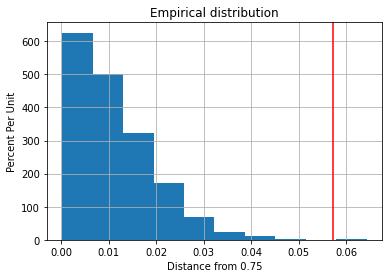

In [58]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df1['Distance from 0.75'])
plt.axvline(x = 0.05732, color = 'red')
plt.title('Empirical distribution')
plt.xlabel('Distance from 0.75')
plt.ylabel('Percent Per Unit')
plt.grid()
plt.show()

6. 
we reject null hypothesis
Alternate hypothesis: Every plant bearing flowers in purple to white ratio is not 3:1

PART -B 

Carry out a hypothesis test for “mean” of a population. The population standard deviation is
13.46, and the test is for a “mean” different from 60. Given: a sample size of 30, with “sample
mean” 65.10. Consider alpha = 0.05. Demonstrate your solution using either the critical-value or
p-value method.


In [18]:
n = 30
xbar = 65.10
mu = 60
sigma = 13.46
alpha = 0.05

Hypothesis test using z-test

In [19]:
z_critical = st.norm.ppf(1-(alpha/2))
z_critical

1.959963984540054

In [20]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

2.075323211943792

In [21]:
if (z < z_critical) and (z > -z_critical): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis
